In [ ]:

    
!pip install networkx
!pip install folium

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
!pip install basemap

  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Not uninstalling six at /shared-libs/python3.7/py-core/lib/python3.7/site-packages, outside environment /root/venv
    Can't uninstall 'six'. No files were found to uninstall.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
pip install --upgrade matplotlib

Requirement already up-to-date: matplotlib in /shared-libs/python3.7/py/lib/python3.7/site-packages (3.5.1)
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install basemap

  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Not uninstalling six at /shared-libs/python3.7/py-core/lib/python3.7/site-packages, outside environment /root/venv
    Can't uninstall 'six'. No files were found to uninstall.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
!pip install toolkits

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import pandas as pd
import numpy as np
import mpl_toolkits
import networkx as nx
import folium

import matplotlib.pyplot as plt


In [2]:
import pandas as pd
import numpy as np

In [ ]:
from mpl_toolkits.basemap import Basemap

In [4]:
path='..'
pasajeros = pd.read_csv(f"{path}/datos_sucios/International_Report_Passengers.csv")[["data_dte","usg_apt","fg_apt","carrier","carriergroup","type","Scheduled","Charter","Total"]]
departamentos = pd.read_csv(f"{path}/datos_sucios/International_Report_Departures.csv")[["data_dte","usg_apt","fg_apt","carrier","carriergroup","type","Scheduled","Charter","Total"]]
pasajeros.head()

,data_dte,usg_apt,fg_apt,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2014,RDU,CUN,AM,0,Passengers,0,315,315
1,06/01/2007,MCO,YHZ,C6,0,Passengers,0,683,683
2,12/01/2005,DTW,AUA,RD,1,Passengers,0,1010,1010
3,04/01/2003,MSP,ZIH,MG,1,Passengers,0,508,508
4,12/01/2005,GUM,CRK,TZ,1,Passengers,0,76,76


In [ ]:
# https://ourairports.com/data/
# De la pagina anterior se descargan los datos airports.csv
aeropuertos_2 = pd.read_csv(f"{path}/datos_sucios/airports.csv")[["latitude_deg","longitude_deg","iata_code"]].dropna()
aeropuertos_2

,latitude_deg,longitude_deg,iata_code
229,11.222000,169.852005,UTK
462,25.325399,-80.274803,OCA
626,61.934601,-162.899994,PQS
705,38.851918,-106.928341,CSE
1130,30.251801,-98.622498,JCY
...,...,...,...
71940,41.639801,123.483002,SHE
71941,60.792990,-138.694027,ZYA
71942,42.882801,129.451004,YNJ
71943,40.542524,122.358600,YKH


In [ ]:
pasajeros

,data_dte,usg_apt,fg_apt,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2014,RDU,CUN,AM,0,Passengers,0,315,315
1,06/01/2007,MCO,YHZ,C6,0,Passengers,0,683,683
2,12/01/2005,DTW,AUA,RD,1,Passengers,0,1010,1010
3,04/01/2003,MSP,ZIH,MG,1,Passengers,0,508,508
4,12/01/2005,GUM,CRK,TZ,1,Passengers,0,76,76
...,...,...,...,...,...,...,...,...,...
680980,10/01/2015,JFK,LHR,BA,0,Passengers,130217,0,130217
680981,09/01/2014,JFK,LHR,BA,0,Passengers,132052,0,132052
680982,10/01/2014,JFK,LHR,BA,0,Passengers,132822,0,132822
680983,08/01/2014,JFK,LHR,BA,0,Passengers,134263,0,134263


In [ ]:
departamentos

,data_dte,usg_apt,fg_apt,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,GUM,MAJ,PFQ,1,Departures,0,10,10
1,05/01/2003,ANC,OKO,5Y,1,Departures,0,15,15
2,03/01/2007,BOS,KEF,GL,1,Departures,0,1,1
3,12/01/2004,DAL,YYZ,AMQ,1,Departures,0,1,1
4,05/01/2009,MIA,CMW,5L,0,Departures,0,20,20
...,...,...,...,...,...,...,...,...,...
930803,07/01/2000,MIA,NAS,MQ,1,Departures,1422,0,1422
930804,04/01/2019,MIA,PTY,CM,0,Departures,1439,0,1439
930805,08/01/2000,MIA,NAS,MQ,1,Departures,1441,0,1441
930806,09/01/2004,IAH,VSA,AM,0,Departures,1461,0,1461


In [ ]:
A = pasajeros[["usg_apt"]]
A1 = pd.unique(A["usg_apt"])

In [ ]:
B = pasajeros[["fg_apt"]]
B1 = pd.unique(B["fg_apt"])

In [ ]:
C = departamentos[["usg_apt"]]
C1 = pd.unique(C["usg_apt"])

In [ ]:
D = departamentos[["fg_apt"]]
D1 = pd.unique(D["fg_apt"])

In [ ]:
A2 = np.concatenate((A1,B1 ,C1,D1),axis=0)
A3 = pd.unique(A2)
A3.shape

(2689,)

In [ ]:
df_aeropuertos = pd.DataFrame(A3,columns=["Aeropuerto Codigo"]).dropna()
df_aeropuertos

,Aeropuerto Codigo
0,RDU
1,MCO
2,DTW
3,MSP
4,GUM
...,...
2684,NIA
2685,SFC
2686,JAK
2687,LAZ


In [ ]:
BB = df_aeropuertos.merge(aeropuertos_2,left_on="Aeropuerto Codigo",right_on="iata_code")[["iata_code","latitude_deg","longitude_deg"]]
BB

,iata_code,latitude_deg,longitude_deg
0,RDU,35.877602,-78.787498
1,MCO,28.429399,-81.308998
2,DTW,42.212399,-83.353401
3,MSP,44.882000,-93.221802
4,GUM,13.483400,144.796005
...,...,...,...
2443,CGC,-5.458965,148.432417
2444,NIA,7.500000,-8.600000
2445,SFC,16.257799,-61.262501
2446,JAK,18.241100,-72.518501


In [ ]:
pasajeros1 = pasajeros.merge(aeropuertos_2,left_on="usg_apt",right_on="iata_code")[['data_dte', 'latitude_deg', 'longitude_deg','usg_apt', 'fg_apt', 'carrier', 'carriergroup', 'type', 'Scheduled', 'Charter', 'Total']]
pasajeros1.set_axis(['Fecha', 'Latitud Salida', 'Longitud Salida','Iata Code Salida', 'Iata Code Llegada', 'carrier', 'carriergroup', 'type', 'Scheduled', 'Charter', 'Total'],axis="columns",inplace=True)
pasajeros1 = pasajeros1.merge(aeropuertos_2,left_on="Iata Code Llegada",right_on="iata_code")[['Fecha', 'Latitud Salida', 'Longitud Salida', 'Iata Code Salida','latitude_deg', 'longitude_deg','Iata Code Llegada', 'carrier', 'carriergroup', 'type', 'Scheduled','Charter', 'Total', 'latitude_deg', 'longitude_deg']]
pasajeros1.set_axis(['Fecha', 'Latitud Salida', 'Longitud Salida', 'Iata Code Salida','Latitud Llegada', 'Longitud Llegada','Iata Code Llegada', 'carrier', 'carriergroup', 'type', 'Scheduled','Charter', 'Total', 'latitude_deg', 'longitude_deg'],axis="columns",inplace=True)
pasajeros1["Latitud Salida"] = pasajeros1["Latitud Salida"]
pasajeros1["Longitud Salida"] = pasajeros1["Longitud Salida"]

pasajeros1["Latitud Llegada"] = pasajeros1["Latitud Llegada"]
pasajeros1["Longitud Llegada"] = pasajeros1["Longitud Llegada"]

pasajeros1 = pasajeros1[['Fecha','Latitud Salida',"Longitud Salida",'Iata Code Salida',"Latitud Llegada","Longitud Llegada",'Iata Code Llegada', 'carrier','carriergroup', 'type', 'Scheduled', 'Charter', 'Total']]
pasajeros1

,Fecha,Latitud Salida,Longitud Salida,Iata Code Salida,Latitud Llegada,Longitud Llegada,Iata Code Llegada,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2014,35.877602,-78.787498,RDU,21.036501,-86.877098,CUN,AM,0,Passengers,0,315,315
1,04/01/2001,35.877602,-78.787498,RDU,21.036501,-86.877098,CUN,T9,1,Passengers,0,605,605
2,03/01/2002,35.877602,-78.787498,RDU,21.036501,-86.877098,CUN,MMQ,1,Passengers,0,669,669
3,11/01/2001,35.877602,-78.787498,RDU,21.036501,-86.877098,CUN,PCQ,1,Passengers,0,26,26
4,02/01/2005,35.877602,-78.787498,RDU,21.036501,-86.877098,CUN,DL,1,Passengers,0,289,289
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679555,05/01/2002,33.988800,-98.491898,SPS,44.055199,27.178801,SLS,XP,1,Passengers,110,0,110
679556,09/01/2019,39.103298,-84.418602,LUK,51.102699,16.885799,WRO,VJT,0,Passengers,0,2,2
679557,05/01/2019,32.036499,-102.100998,MDD,3.326667,117.569444,TRK,3EQ,1,Passengers,0,5,5
679558,06/01/2002,56.255001,-158.774994,KCQ,7.891290,-11.176600,KEN,IAS,1,Passengers,1,0,1


In [ ]:
departamentos1 = departamentos.merge(aeropuertos_2,left_on="usg_apt",right_on="iata_code")[['data_dte', 'latitude_deg', 'longitude_deg','usg_apt', 'fg_apt', 'carrier', 'carriergroup', 'type', 'Scheduled', 'Charter', 'Total']]
departamentos1.set_axis(['Fecha', 'Latitud Salida', 'Longitud Salida','Iata Code Salida', 'Iata Code Llegada', 'carrier', 'carriergroup', 'type', 'Scheduled', 'Charter', 'Total'],axis="columns",inplace=True)
departamentos1 = departamentos1.merge(aeropuertos_2,left_on="Iata Code Llegada",right_on="iata_code")[['Fecha', 'Latitud Salida', 'Longitud Salida', 'Iata Code Salida','latitude_deg', 'longitude_deg','Iata Code Llegada', 'carrier', 'carriergroup', 'type', 'Scheduled','Charter', 'Total', 'latitude_deg', 'longitude_deg']]
departamentos1.set_axis(['Fecha', 'Latitud Salida', 'Longitud Salida', 'Iata Code Salida','Latitud Llegada', 'Longitud Llegada','Iata Code Llegada', 'carrier', 'carriergroup', 'type', 'Scheduled','Charter', 'Total', 'latitude_deg', 'longitude_deg'],axis="columns",inplace=True)
departamentos1["Latitud Salida"] = departamentos1["Latitud Salida"]
departamentos1["Longitud Salida"] = departamentos1["Longitud Salida"]

departamentos1["Latitud Llegada"] = departamentos1["Latitud Llegada"]
departamentos1["Longitud Llegada"] = departamentos1["Longitud Llegada"]

departamentos1 = departamentos1[['Fecha', "Latitud Salida","Longitud Salida",'Iata Code Salida',"Latitud Llegada","Longitud Llegada",'Iata Code Llegada', 'carrier','carriergroup', 'type', 'Scheduled', 'Charter', 'Total']]
departamentos1

,Fecha,Latitud Salida,Longitud Salida,Iata Code Salida,Latitud Llegada,Longitud Llegada,Iata Code Llegada,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,13.483400,144.796005,GUM,7.064760,171.272003,MAJ,PFQ,1,Departures,0,10,10
1,01/01/2005,13.483400,144.796005,GUM,7.064760,171.272003,MAJ,PFQ,1,Departures,0,28,28
2,07/01/2010,13.483400,144.796005,GUM,7.064760,171.272003,MAJ,PFQ,1,Departures,0,6,6
3,01/01/2010,13.483400,144.796005,GUM,7.064760,171.272003,MAJ,PFQ,1,Departures,0,6,6
4,11/01/2002,13.483400,144.796005,GUM,7.064760,171.272003,MAJ,PFQ,1,Departures,0,29,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
930745,05/01/2001,70.467040,-157.436013,ATK,-30.039200,145.951996,BRK,3K,1,Departures,1,0,1
930746,02/01/2002,60.136667,-164.279167,CYF,34.073601,139.559998,MYE,ERA,1,Departures,1,0,1
930747,03/01/2002,55.849602,-133.227994,NKI,5.172755,-59.491482,KAI,TQA,1,Departures,1,0,1
930748,01/01/2002,63.329498,-142.953995,TKJ,-23.845269,29.458615,PTG,WRB,1,Departures,2,0,2


In [ ]:
compression_opts = dict(method='zip',
                        archive_name='pasajeros.csv')  
pasajeros1.to_csv('pasajeros.zip', index=False,
          compression=compression_opts)

In [ ]:
compression_opts = dict(method='zip',
                        archive_name='departamentos.csv')  
departamentos1.to_csv('departamentos.zip', index=False,
          compression=compression_opts)

## Cuantos aeropuertos no se encontraron

In [ ]:
X = pd.unique(df_aeropuertos["Aeropuerto Codigo"])

X

array(['RDU', 'MCO', 'DTW', ..., 'JAK', 'LAZ', 'QNE'], dtype=object)

In [ ]:
Z = pd.unique(aeropuertos_2["iata_code"])
Z

array(['UTK', 'OCA', 'PQS', ..., 'YNJ', 'YKH', 'ZYW'], dtype=object)

In [ ]:
x = []
for j in X:
    if j in Z:
        continue
    else:
        x.append(j)

print(len(x))

246


In [ ]:
print(x)

['FQQ', 'NXX', 'ZZZ', 'DQK', 'DQF', 'DNE', 'MPS', 'NY3', 'MPR', 'AL5', 'S27', 'WAS', 'JCC', 'TX5', 'C01', 'FL4', 'JZI', 'OH4', 'DQU', 'NCQ', 'JRV', 'MUL', 'VWH', 'SC1', 'JOR', 'N1C', 'QAK', 'JQF', 'OR4', 'JDX', 'II3', 'JZT', 'NYL', 'CT1', 'GA5', 'PA3', 'CHI', 'FL6', 'IA4', 'WQN', 'VA5', 'FVO', 'NGM', 'PFN', 'UCA', 'MKT', 'UXP', 'NBU', 'NGP', '1B1', 'MI2', 'QMA', 'NC1', 'RQZ', 'T3X', 'TN8', 'ZXU', 'MA4', 'N2C', 'S24', 'WA3', 'NC8', 'CHD', 'JZQ', 'DQN', 'SSM', 'VWK', 'MN7', 'GA7', 'IL2', 'TN2', 'PA5', 'IN6', 'DTT', 'FHB', 'KY5', 'WA5', 'T8X', 'FL7', '3TX', 'DOF', 'FQD', 'RBH', 'XXX', 'NYC', 'UBF', 'SES', 'YNK', 'HOW', 'CA2', 'BR1', 'SXF', 'DCS', 'HBL', 'YCJ', 'OQU', 'ENQ', 'MLH', 'MOW', 'ZXA', 'EXU', 'THF', 'CHE', 'PAR', 'BAK', 'HBI', 'YDS', 'PEO', 'FVT', 'LRI', 'ZSL', 'SPK', 'QC1', 'WGL', 'SWI', 'GMC', 'SRI', 'CSL', 'CA5', 'STO', 'ON1', 'RU4', 'TYO', 'CO5', 'SEL', 'FRF', 'GEN', 'YAF', 'CGU', 'PLA', 'NDZ', 'XWQ', 'VZX', 'NCP', 'PPO', 'BC3', 'PT1', 'BC5', 'BC9', 'YR1', 'UK1', 'CN9', 'B4C'

In [ ]:
pasajeros1.tail()

,Fecha,Latitud Salida,Longitud Salida,Iata Code Salida,Latitud Llegada,Longitud Llegada,Iata Code Llegada,carrier,carriergroup,type,Scheduled,Charter,Total
679555,05/01/2002,33.988800,-98.491898,SPS,44.055199,27.178801,SLS,XP,1,Passengers,110,0,110
679556,09/01/2019,39.103298,-84.418602,LUK,51.102699,16.885799,WRO,VJT,0,Passengers,0,2,2
679557,05/01/2019,32.036499,-102.100998,MDD,3.326667,117.569444,TRK,3EQ,1,Passengers,0,5,5
679558,06/01/2002,56.255001,-158.774994,KCQ,7.891290,-11.176600,KEN,IAS,1,Passengers,1,0,1
679559,02/01/2002,60.136667,-164.279167,CYF,34.073601,139.559998,MYE,ERA,1,Passengers,18,0,18


In [ ]:
m = folium.Map()
for i in range(len(pasajeros1['Latitud Salida'].unique())):
    folium.Marker([pasajeros1['Latitud Salida'].unique()[i], pasajeros1['Longitud Salida'].unique()[i]]).add_to(m)

'''
for j in range(len(pasajeros1['Latitud Llegada'].unique())):
    folium.Marker([pasajeros1['Latitud Llegada'].unique()[j], pasajeros1['Longitud Llegada'].unique()[j]]).add_to(m)
'''
m

In [ ]:
pasajeros1.dropna()

,Fecha,Latitud Salida,Longitud Salida,Iata Code Salida,Latitud Llegada,Longitud Llegada,Iata Code Llegada,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2014,35.877602,-78.787498,RDU,21.036501,-86.877098,CUN,AM,0,Passengers,0,315,315
1,04/01/2001,35.877602,-78.787498,RDU,21.036501,-86.877098,CUN,T9,1,Passengers,0,605,605
2,03/01/2002,35.877602,-78.787498,RDU,21.036501,-86.877098,CUN,MMQ,1,Passengers,0,669,669
3,11/01/2001,35.877602,-78.787498,RDU,21.036501,-86.877098,CUN,PCQ,1,Passengers,0,26,26
4,02/01/2005,35.877602,-78.787498,RDU,21.036501,-86.877098,CUN,DL,1,Passengers,0,289,289
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679555,05/01/2002,33.988800,-98.491898,SPS,44.055199,27.178801,SLS,XP,1,Passengers,110,0,110
679556,09/01/2019,39.103298,-84.418602,LUK,51.102699,16.885799,WRO,VJT,0,Passengers,0,2,2
679557,05/01/2019,32.036499,-102.100998,MDD,3.326667,117.569444,TRK,3EQ,1,Passengers,0,5,5
679558,06/01/2002,56.255001,-158.774994,KCQ,7.891290,-11.176600,KEN,IAS,1,Passengers,1,0,1


In [ ]:

aereo_prueba=pasajeros1.sample(n=149)
aereo_prueba=aereo_prueba.reset_index()
aereo_prueba=aereo_prueba.dropna()
aereo_prueba.head()

,index,Fecha,Latitud Salida,Longitud Salida,Iata Code Salida,Latitud Llegada,Longitud Llegada,Iata Code Llegada,carrier,carriergroup,type,Scheduled,Charter,Total
0,65123,08/01/2010,38.944500,-77.455803,IAD,43.677200,-79.630600,YYZ,AX,1,Passengers,6150,0,6150
1,329459,07/01/1994,41.978600,-87.904800,ORD,49.012798,2.550000,CDG,TZ,1,Passengers,0,257,257
2,57951,07/01/2011,37.505199,-77.319702,RIC,43.677200,-79.630600,YYZ,AC,0,Passengers,84,0,84
3,348504,11/01/2002,33.636700,-84.428101,ATL,53.349375,-2.279521,MAN,DL,1,Passengers,14190,0,14190
4,141690,08/01/2011,41.411701,-81.849800,CLE,45.470600,-73.740799,YUL,XE,1,Passengers,6195,0,6195


In [ ]:
#Gráfica de todos los datos que tenemos e prueba
DG_comp = nx.DiGraph()
edges = zip(aereo_prueba['Iata Code Salida'], aereo_prueba['Iata Code Llegada'],aereo_prueba['Total'])
DG_comp.add_weighted_edges_from(edges,attr='sum')
DG_comp.remove_edges_from(nx.selfloop_edges(DG_comp))

In [ ]:
#Vemos las posiciones de cada nodo según su latitud y longitud
posprue = {}
for i, j, k in zip(aereo_prueba['Iata Code Salida'],aereo_prueba['Latitud Salida'],aereo_prueba['Longitud Salida']):
    posprue[i] = (k,j)
for i, j, k in zip(aereo_prueba['Iata Code Llegada'],aereo_prueba['Latitud Llegada'],aereo_prueba['Longitud Llegada']):
    posprue[i] = (k,j)

In [ ]:
#Gráfica de todos los datos que tenemos total
DG_comptot = nx.DiGraph()
edgestot = zip(pasajeros1['Iata Code Salida'], pasajeros1['Iata Code Llegada'],pasajeros1['Total'])
DG_comptot.add_weighted_edges_from(edgestot,attr='sum')
DG_comptot.remove_edges_from(nx.selfloop_edges(DG_comptot))

In [ ]:
#Vemos las posiciones de cada nodo según su latitud y longitud
postot = {}
for i, j, k in zip(pasajeros1['Iata Code Salida'],pasajeros1['Latitud Salida'],pasajeros1['Longitud Salida']):
    postot[i] = (k,j)
for i, j, k in zip(pasajeros1['Iata Code Llegada'],pasajeros1['Latitud Llegada'],pasajeros1['Longitud Llegada']):
    postot[i] = (k,j)


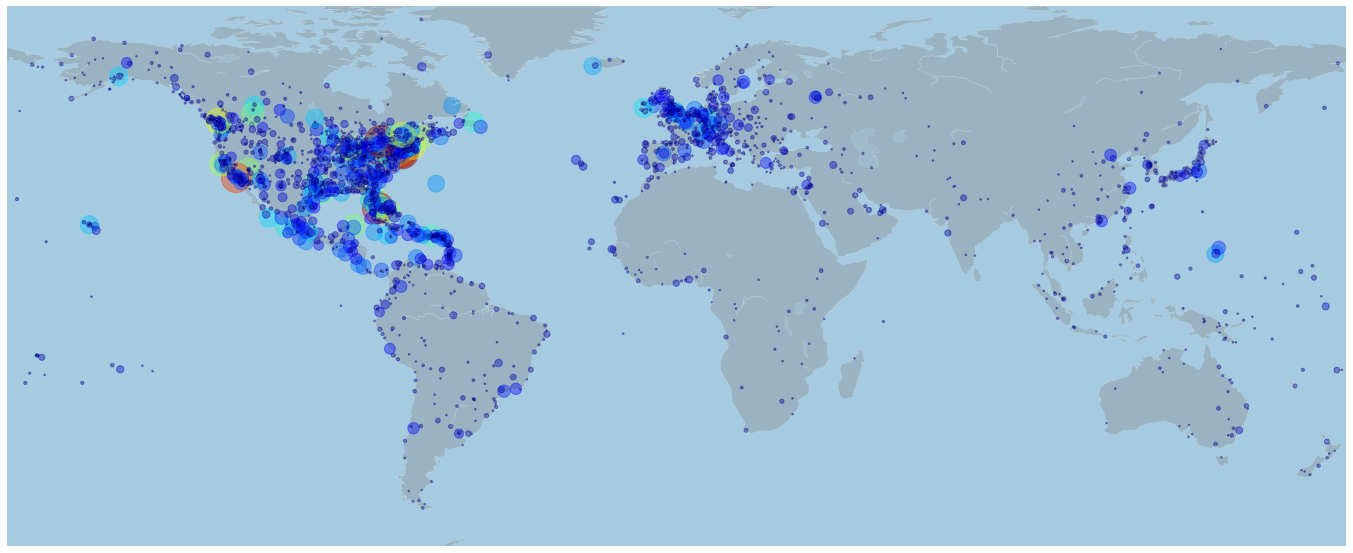

In [ ]:
  plt.figure(figsize=(24,16))
  diccionariotot = nx.degree_centrality(DG_comptot)
  #diccionario2=aereo_max['Total']
  sizestot = np.array([diccionariotot[i] for i in DG_comptot])

  colorstot = np.array([diccionariotot[i] for i in DG_comptot])
  nx.draw_networkx_nodes(DG_comptot,
                       node_size = 5000*sizestot,
                       #node_size=grados,
                       cmap = 'jet',
                       node_color =colorstot ,
                       pos=postot,alpha=0.4)
m=Basemap(llcrnrlon=-180, llcrnrlat=-65, urcrnrlon=180, urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")



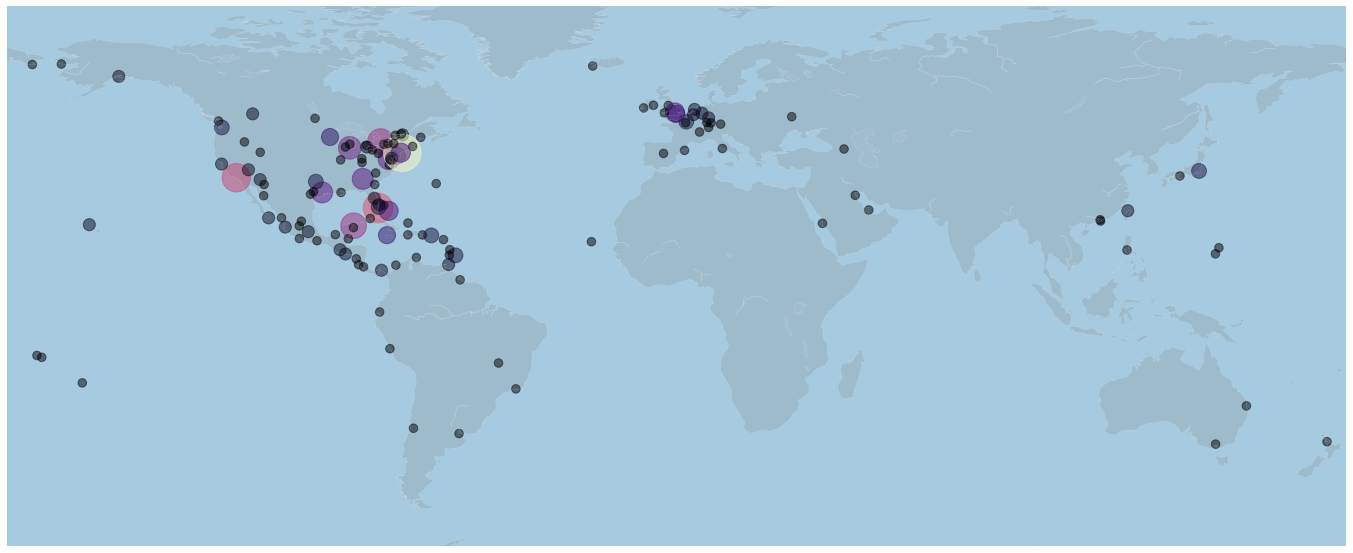

In [ ]:
  plt.figure(figsize=(24,16))
  diccionario1 = nx.degree_centrality(DG_comp)
  diccionario2=aereo_prueba['Total']
  
  sizes = np.array([diccionario1[i] for i in DG_comp])

  colors = np.array([diccionario1[i] for i in DG_comp])
  nx.draw_networkx_nodes(DG_comp,
                       node_size = 10000*sizes,
                       #node_size=grados,
                       cmap = 'magma',
                       node_color =colors ,
                       pos=posprue,alpha=0.5)
m=Basemap(llcrnrlon=-180, llcrnrlat=-65, urcrnrlon=180, urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.2)
m.drawcoastlines(linewidth=0.1, color="white")



In [ ]:
n = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=3)
for i in range(0,len(aereo_prueba)):
   folium.CircleMarker(
      location=[aereo_prueba.iloc[i]['Latitud Salida'], aereo_prueba.iloc[i]['Longitud Salida']],
      popup=aereo_prueba.iloc[i]['Iata Code Salida'],
      radius=float(aereo_prueba.iloc[i]['Total'])*0.0001,
      color='#69b3a2',
      fill=True,
      fill_color='#69b3a2'
   ).add_to(n)

for i in range(0,len(aereo_prueba)):
   folium.CircleMarker(
      location=[aereo_prueba.iloc[i]['Latitud Llegada'], aereo_prueba.iloc[i]['Longitud Llegada']],
      popup=aereo_prueba.iloc[i]['Iata Code Llegada'],
      radius=float(aereo_prueba.iloc[i]['Total'])*0.0001,
      color='blue',
      fill=True,
      fill_color='blue'
   ).add_to(n)
n


In [ ]:
pasa=pasajeros1
pasa.head()
p=pasa.loc[:,['Latitud Salida', 'Longitud Salida', 'Iata Code Salida','Total']]
p.head()



,Latitud Salida,Longitud Salida,Iata Code Salida,Total
0,35.877602,-78.787498,RDU,315
1,35.877602,-78.787498,RDU,605
2,35.877602,-78.787498,RDU,669
3,35.877602,-78.787498,RDU,26
4,35.877602,-78.787498,RDU,289


In [ ]:
p=p.groupby(['Iata Code Salida']).sum()


p=p.sort_values(by=['Total'],ascending=False)

<BarContainer object of 741 artists>

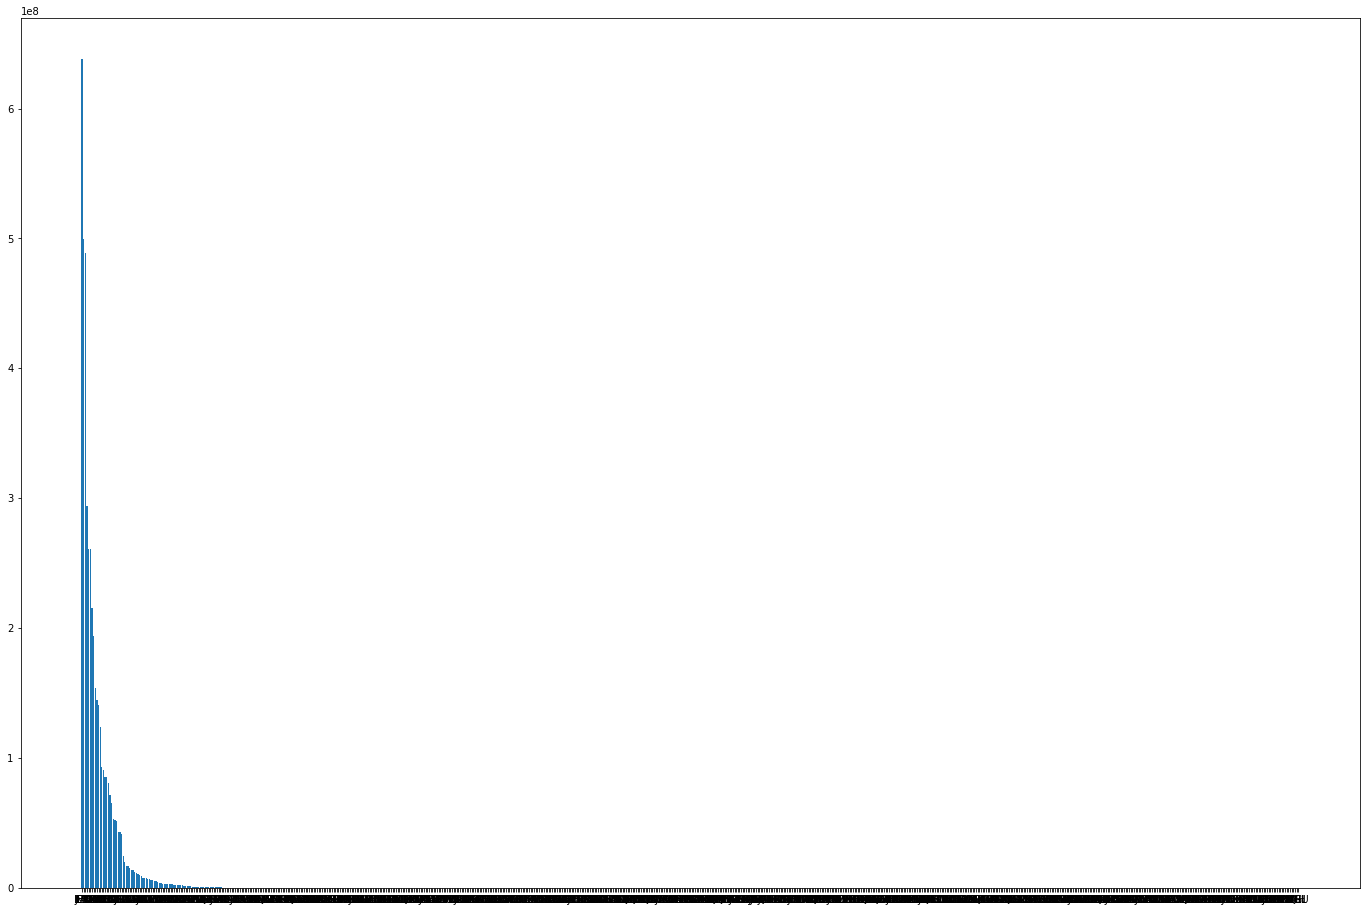

In [ ]:
plt.figure(figsize=(24,16))
plt.bar(p.index,p['Total'])


Text(0.5, 0, 'aeropuertos')

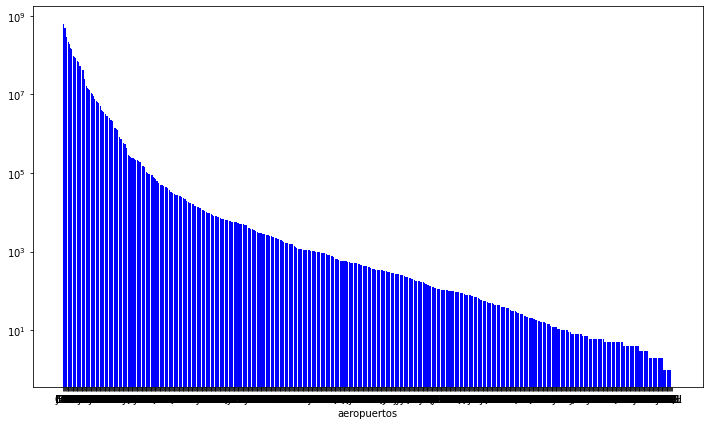

In [ ]:

fig, ax = plt.subplots(figsize=(12, 7))

ax.bar(p.index,p['Total'],  align="edge", color='blue');
ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlabel('aeropuertos')

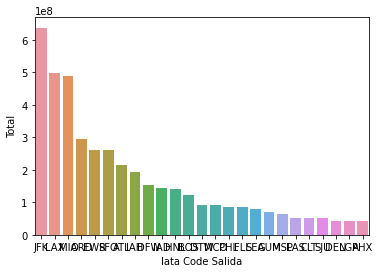

In [ ]:
import seaborn as sns
from numpy import median
p2=p.head(25)
ax = sns.barplot(x=p2.index, y=p2['Total'], data=p2, estimator=median)

In [ ]:
passengers = pd.read_csv(f"{path}/datos_limpios/Passengers_Pais.csv")
passengers['Fecha'] = pd.to_datetime(passengers['Fecha'], format='%m/%d/%Y')
passengers

,Fecha,Coordenadas Salida,Iata Code Salida,Coordenadas Llegada,Iata Code Llegada,carrier,carriergroup,type,Scheduled,Charter,...,ciudad_salida,pais_salida,pais_code_salida,estado_salida,condado_salida,ciudad_llegada,pais_llegada,pais_code_llegada,estado_llegada,condado_llegada
0,2014-05-01,"35.87760162353516,-78.7874984741211",RDU,"21.036500930800003,-86.8770980835",CUN,AM,0,Passengers,0,315,...,Raleigh-durham,United States,us,North Carolina,Wake County,Cancun,México,mx,Quintana Roo,Benito Juárez
1,2001-04-01,"35.87760162353516,-78.7874984741211",RDU,"21.036500930800003,-86.8770980835",CUN,T9,1,Passengers,0,605,...,Raleigh-durham,United States,us,North Carolina,Wake County,Cancun,México,mx,Quintana Roo,Benito Juárez
2,2002-03-01,"35.87760162353516,-78.7874984741211",RDU,"21.036500930800003,-86.8770980835",CUN,MMQ,1,Passengers,0,669,...,Raleigh-durham,United States,us,North Carolina,Wake County,Cancun,México,mx,Quintana Roo,Benito Juárez
3,2001-11-01,"35.87760162353516,-78.7874984741211",RDU,"21.036500930800003,-86.8770980835",CUN,PCQ,1,Passengers,0,26,...,Raleigh-durham,United States,us,North Carolina,Wake County,Cancun,México,mx,Quintana Roo,Benito Juárez
4,2005-02-01,"35.87760162353516,-78.7874984741211",RDU,"21.036500930800003,-86.8770980835",CUN,DL,1,Passengers,0,289,...,Raleigh-durham,United States,us,North Carolina,Wake County,Cancun,México,mx,Quintana Roo,Benito Juárez
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679555,2002-05-01,"33.9888,-98.491898",SPS,"44.055199,27.178801",SLS,XP,1,Passengers,110,0,...,Wichita Falls,United States,us,Texas,Wichita County,NaN,Бългaрия,bg,NaN,Силистра
679556,2019-09-01,"39.10329819,-84.41860199",LUK,"51.102699,16.885799",WRO,VJT,0,Passengers,0,2,...,Cincinnati,United States,us,Ohio,Hamilton County,Wrocław,Polska,pl,województwo dolnośląskie,Wrocław
679557,2019-05-01,"32.0364990234,-102.100997925",MDD,"3.326667,117.569444",TRK,3EQ,1,Passengers,0,5,...,Midland,United States,us,Texas,Midland County,Tarakan,Indonesia,id,Kalimantan Utara,NaN
679558,2002-06-01,"56.2550010681,-158.774993896",KCQ,"7.891290187835693,-11.176600456237791",KEN,IAS,1,Passengers,1,0,...,NaN,United States,us,Alaska,Lake and Peninsula,Kenema,Sierra Leone,sl,Kenema District,NaN


In [ ]:
passengers1 =  passengers.loc[(passengers["Fecha"] >= np.datetime64('2001-09-01')) & (passengers["Fecha"] <= np.datetime64('2001-09-30'))]
passengers1 = passengers1.sort_values(by="Fecha")
#passengers1=passengers1['Coordenadas Salida'].str.split(',', expand=True)
passengers1

,Fecha,Coordenadas Salida,Iata Code Salida,Coordenadas Llegada,Iata Code Llegada,carrier,carriergroup,type,Scheduled,Charter,...,ciudad_salida,pais_salida,pais_code_salida,estado_salida,condado_salida,ciudad_llegada,pais_llegada,pais_code_llegada,estado_llegada,condado_llegada
980,2001-09-01,"42.212398529052734,-83.35340118408203",DTW,"21.036500930800003,-86.8770980835",CUN,MG,1,Passengers,0,1846,...,Detroit,United States,us,Michigan,Wayne County,Cancun,México,mx,Quintana Roo,Benito Juárez
461443,2001-09-01,"40.639801,-73.7789",JFK,"41.2971,2.07846",BCN,DL,1,Passengers,5561,0,...,New York,United States,us,New York,NaN,Barcelona españa,España,es,Catalunya,Baix Llobregat
461280,2001-09-01,"40.639801,-73.7789",JFK,"41.2971,2.07846",BCN,X9,1,Passengers,0,694,...,New York,United States,us,New York,NaN,Barcelona españa,España,es,Catalunya,Baix Llobregat
459201,2001-09-01,"33.942501,-118.407997",LAX,"48.7233333,2.3794444",ORY,IJ,0,Passengers,3937,0,...,Los Angeles,United States,us,California,Los Angeles County,NaN,France,fr,Île-de-France,Val-de-Marne
459050,2001-09-01,"33.942501,-118.407997",LAX,"48.7233333,2.3794444",ORY,CYQ,0,Passengers,0,5103,...,Los Angeles,United States,us,California,Los Angeles County,NaN,France,fr,Île-de-France,Val-de-Marne
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235978,2001-09-01,"38.9445,-77.455803",IAD,"47.458056,8.548056",ZRH,SR,0,Passengers,8601,0,...,Washington,United States,us,Virginia,Loudoun County,Zurich,Schweiz/Suisse/Svizzera/Svizra,ch,Zürich,Bezirk Bülach
235779,2001-09-01,"39.2976,-94.713898",MCI,"47.458056,8.548056",ZRH,X9,1,Passengers,0,327,...,Kansas City,United States,us,Missouri,Platte County,Zurich,Schweiz/Suisse/Svizzera/Svizra,ch,Zürich,Bezirk Bülach
235612,2001-09-01,"61.1744,-149.996002",ANC,"47.458056,8.548056",ZRH,BBQ,0,Passengers,0,255,...,Anchorage,NaN,us,Alaska,Anchorage,Zurich,Schweiz/Suisse/Svizzera/Svizra,ch,Zürich,Bezirk Bülach
238893,2001-09-01,"40.692501,-74.168701",EWR,"21.773697,-72.268321",PLS,MMQ,1,Passengers,0,1147,...,Newark,United States,us,New Jersey,Essex County,Providenciales,Turks and Caicos Islands,tc,NaN,Providenciales


In [ ]:

passengers1[["Longitud Llegada", "Latitud Llegada"]] = passengers1["Coordenadas Llegada"].str.split(pat=",", expand=True)
passengers1[["Longitud Salida", "Latitud Salida"]] = passengers1["Coordenadas Salida"].str.split(pat=",", expand=True)
passengers1

,Fecha,Coordenadas Salida,Iata Code Salida,Coordenadas Llegada,Iata Code Llegada,carrier,carriergroup,type,Scheduled,Charter,...,condado_salida,ciudad_llegada,pais_llegada,pais_code_llegada,estado_llegada,condado_llegada,Longitud Llegada,Latitud Llegada,Longitud Salida,Latitud Salida
980,2001-09-01,"42.212398529052734,-83.35340118408203",DTW,"21.036500930800003,-86.8770980835",CUN,MG,1,Passengers,0,1846,...,Wayne County,Cancun,México,mx,Quintana Roo,Benito Juárez,21.036500930800003,-86.8770980835,42.212398529052734,-83.35340118408203
461443,2001-09-01,"40.639801,-73.7789",JFK,"41.2971,2.07846",BCN,DL,1,Passengers,5561,0,...,NaN,Barcelona españa,España,es,Catalunya,Baix Llobregat,41.2971,2.07846,40.639801,-73.7789
461280,2001-09-01,"40.639801,-73.7789",JFK,"41.2971,2.07846",BCN,X9,1,Passengers,0,694,...,NaN,Barcelona españa,España,es,Catalunya,Baix Llobregat,41.2971,2.07846,40.639801,-73.7789
459201,2001-09-01,"33.942501,-118.407997",LAX,"48.7233333,2.3794444",ORY,IJ,0,Passengers,3937,0,...,Los Angeles County,NaN,France,fr,Île-de-France,Val-de-Marne,48.7233333,2.3794444,33.942501,-118.407997
459050,2001-09-01,"33.942501,-118.407997",LAX,"48.7233333,2.3794444",ORY,CYQ,0,Passengers,0,5103,...,Los Angeles County,NaN,France,fr,Île-de-France,Val-de-Marne,48.7233333,2.3794444,33.942501,-118.407997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235978,2001-09-01,"38.9445,-77.455803",IAD,"47.458056,8.548056",ZRH,SR,0,Passengers,8601,0,...,Loudoun County,Zurich,Schweiz/Suisse/Svizzera/Svizra,ch,Zürich,Bezirk Bülach,47.458056,8.548056,38.9445,-77.455803
235779,2001-09-01,"39.2976,-94.713898",MCI,"47.458056,8.548056",ZRH,X9,1,Passengers,0,327,...,Platte County,Zurich,Schweiz/Suisse/Svizzera/Svizra,ch,Zürich,Bezirk Bülach,47.458056,8.548056,39.2976,-94.713898
235612,2001-09-01,"61.1744,-149.996002",ANC,"47.458056,8.548056",ZRH,BBQ,0,Passengers,0,255,...,Anchorage,Zurich,Schweiz/Suisse/Svizzera/Svizra,ch,Zürich,Bezirk Bülach,47.458056,8.548056,61.1744,-149.996002
238893,2001-09-01,"40.692501,-74.168701",EWR,"21.773697,-72.268321",PLS,MMQ,1,Passengers,0,1147,...,Essex County,Providenciales,Turks and Caicos Islands,tc,NaN,Providenciales,21.773697,-72.268321,40.692501,-74.168701


In [ ]:
#Gráfica de todos los datos que tenemos e prueba
DGpas1 = nx.DiGraph()
edgespas1 = zip(passengers1['Iata Code Salida'], passengers1['Iata Code Llegada'],passengers1['Total'])
DGpas1.add_weighted_edges_from(edgespas1,attr='sum')
DGpas1.remove_edges_from(nx.selfloop_edges(DGpas1))

#Vemos las posiciones de cada nodo según su latitud y longitud

pospas1 = {}
for i, j, k in zip(passengers1['Iata Code Salida'],passengers1['Latitud Salida'],passengers1['Longitud Salida']):
    pospas1[i] = (k,j)
for i, j, k in zip(passengers1['Iata Code Llegada'],passengers1['Latitud Llegada'],passengers1['Longitud Llegada']):
    pospas1[i] = (k,j)

 

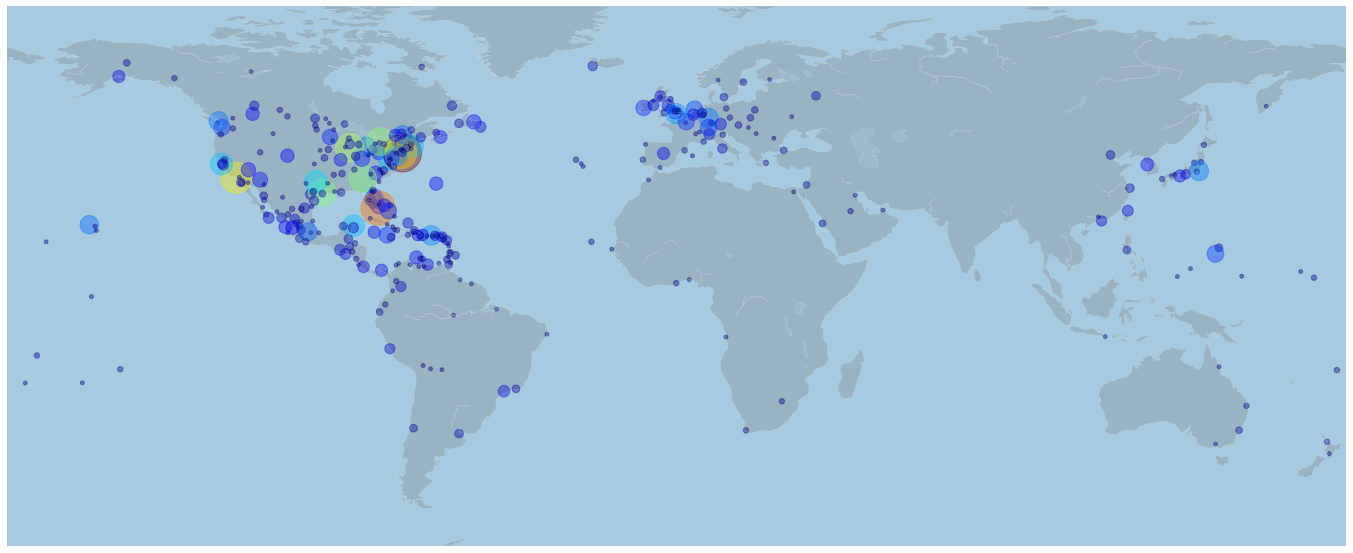

In [ ]:
  plt.figure(figsize=(24,16))
  diccionariopas1 = nx.degree_centrality(DGpas1)
  #diccionario2=aereo_max['Total']
  sizepas1 = np.array([diccionariopas1[i] for i in DGpas1])

  colorspas1 = np.array([diccionariopas1[i] for i in DGpas1])
  nx.draw_networkx_nodes(DGpas1,
                       node_size = 5000*colorspas1,
                       #node_size=grados,
                       cmap = 'jet',
                       node_color =colorspas1 ,
                       pos=postot,alpha=0.4)
m=Basemap(llcrnrlon=-180, llcrnrlat=-65, urcrnrlon=180, urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")


Text(0.5, 0, 'aeropuertos')

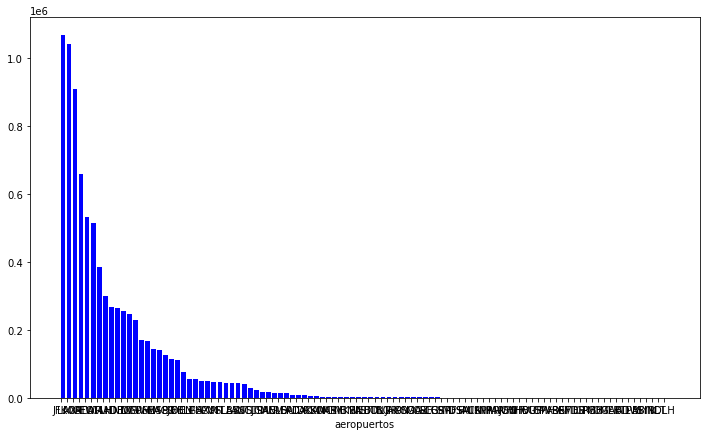

In [ ]:
passengers1=passengers1.groupby(['Iata Code Salida']).sum()


passengers1=passengers1.sort_values(by=['Total'],ascending=False)
fig, ax = plt.subplots(figsize=(12, 7))

ax.bar(passengers1.index,passengers1['Total'],  align="edge", color='blue');
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlabel('aeropuertos')

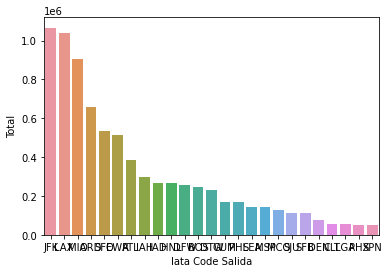

In [ ]:
passengers11=passengers1.head(25)
ax = sns.barplot(x=passengers11.index, y=passengers11['Total'], data=passengers11, estimator=median)

In [ ]:
passengers1

,carriergroup,Scheduled,Charter,Total
Iata Code Salida,,,,
JFK,91,1046729,19382,1066111
LAX,37,1025231,15423,1040654
MIA,71,893472,13492,906964
ORD,48,649718,9486,659204
SFO,24,529866,2628,532494
...,...,...,...,...
ABI,1,53,0,53
SYR,0,0,35,35
INL,1,20,0,20


In [ ]:
passengers2 =  passengers.loc[(passengers["Fecha"] >= np.datetime64('2000-09-01')) & (passengers["Fecha"] <= np.datetime64('2000-09-30'))]
passengers2 = passengers2.sort_values(by="Fecha")
passengers2

,Fecha,Coordenadas Salida,Iata Code Salida,Coordenadas Llegada,Iata Code Llegada,carrier,carriergroup,type,Scheduled,Charter,...,ciudad_salida,pais_salida,pais_code_salida,estado_salida,condado_salida,ciudad_llegada,pais_llegada,pais_code_llegada,estado_llegada,condado_llegada
514,2000-09-01,"28.429399490356445,-81.30899810791016",MCO,"21.036500930800003,-86.8770980835",CUN,LGQ,0,Passengers,0,239,...,Orlando,United States,us,Florida,Orange County,Cancun,México,mx,Quintana Roo,Benito Juárez
456489,2000-09-01,"27.975500106811523,-82.533203125",TPA,"50.036249,8.559294",FRA,DE,0,Passengers,2107,0,...,Tampa,United States,us,Florida,Hillsborough County,Frankfurt am Main,Deutschland,de,Hessen,NaN
456269,2000-09-01,"61.1744,-149.996002",ANC,"50.036249,8.559294",FRA,DE,0,Passengers,1366,0,...,Anchorage,NaN,us,Alaska,Anchorage,Frankfurt am Main,Deutschland,de,Hessen,NaN
455864,2000-09-01,"42.3643,-71.005203",BOS,"50.036249,8.559294",FRA,LH,0,Passengers,33912,0,...,Boston,United States,us,Massachusetts,Suffolk County,Frankfurt am Main,Deutschland,de,Hessen,NaN
455055,2000-09-01,"37.61899948120117,-122.375",SFO,"50.036249,8.559294",FRA,LH,0,Passengers,21886,0,...,South San Francisco,United States,us,California,San Mateo County,Frankfurt am Main,Deutschland,de,Hessen,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241597,2000-09-01,"33.6367,-84.428101",ATL,"16.757099,-99.753998",ACA,DL,1,Passengers,0,196,...,Atlanta,United States,us,Georgia,Fulton County,Acapulco,México,mx,Guerrero,Acapulco de Juárez
241051,2000-09-01,"32.896801,-97.038002",DFW,"16.757099,-99.753998",ACA,GL,1,Passengers,0,239,...,Grapevine,United States,us,Texas,Tarrant County,Acapulco,México,mx,Guerrero,Acapulco de Juárez
240580,2000-09-01,"33.942501,-118.407997",LAX,"16.757099,-99.753998",ACA,UA,1,Passengers,0,319,...,Los Angeles,United States,us,California,Los Angeles County,Acapulco,México,mx,Guerrero,Acapulco de Juárez
188928,2000-09-01,"33.942501,-118.407997",LAX,"53.3097000122,-113.580001831",YEG,CP,0,Passengers,3181,0,...,Los Angeles,United States,us,California,Los Angeles County,Edmonton,Canada,ca,Alberta,Leduc County


Text(0.5, 0, 'aeropuertos')

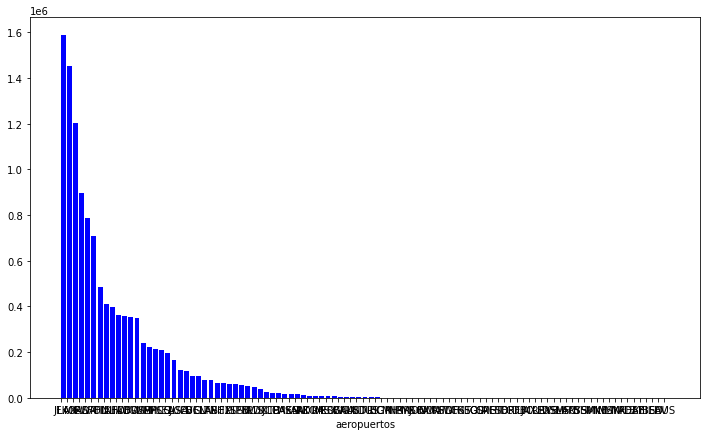

In [ ]:
passengers2=passengers2.groupby(['Iata Code Salida']).sum()


passengers2=passengers2.sort_values(by=['Total'],ascending=False)
fig, ax = plt.subplots(figsize=(12, 7))

ax.bar(passengers2.index,passengers2['Total'],  align="edge", color='blue');
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlabel('aeropuertos')

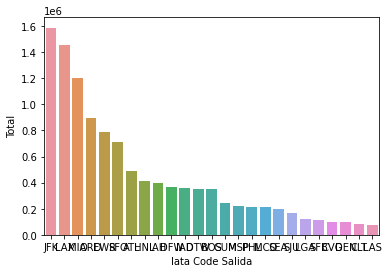

In [ ]:
passengers21=passengers2.head(25)
ax = sns.barplot(x=passengers21.index, y=passengers21['Total'], data=passengers21, estimator=median)

In [ ]:
passengers3 =  passengers.loc[(passengers["Fecha"] >= np.datetime64('2001-08-01')) & (passengers["Fecha"] <= np.datetime64('2001-08-30'))]
passengers3 = passengers3.sort_values(by="Fecha")
passengers3

,Fecha,Coordenadas Salida,Iata Code Salida,Coordenadas Llegada,Iata Code Llegada,carrier,carriergroup,type,Scheduled,Charter,...,ciudad_salida,pais_salida,pais_code_salida,estado_salida,condado_salida,ciudad_llegada,pais_llegada,pais_code_llegada,estado_llegada,condado_llegada
662,2001-08-01,"28.429399490356445,-81.30899810791016",MCO,"21.036500930800003,-86.8770980835",CUN,MX,0,Passengers,1140,0,...,Orlando,United States,us,Florida,Orange County,Cancun,México,mx,Quintana Roo,Benito Juárez
463537,2001-08-01,"39.87189865112305,-75.24109649658203",PHL,"41.804532,12.251998",FCO,US,1,Passengers,13445,0,...,Philadelphia,United States,us,Pennsylvania,Philadelphia County,Rome,Italia,it,Lazio,Roma Capitale
462840,2001-08-01,"39.1754,-76.668297",BWI,"41.804532,12.251998",FCO,US,1,Passengers,240,0,...,Baltimore,United States,us,Maryland,Anne Arundel County,Rome,Italia,it,Lazio,Roma Capitale
462770,2001-08-01,"42.212398529052734,-83.35340118408203",DTW,"41.804532,12.251998",FCO,NW,1,Passengers,13911,0,...,Detroit,United States,us,Michigan,Wayne County,Rome,Italia,it,Lazio,Roma Capitale
462412,2001-08-01,"42.3643,-71.005203",BOS,"41.2971,2.07846",BCN,DL,1,Passengers,149,0,...,Boston,United States,us,Massachusetts,Suffolk County,Barcelona españa,España,es,Catalunya,Baix Llobregat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235613,2001-08-01,"61.1744,-149.996002",ANC,"47.458056,8.548056",ZRH,BBQ,0,Passengers,0,1045,...,Anchorage,NaN,us,Alaska,Anchorage,Zurich,Schweiz/Suisse/Svizzera/Svizra,ch,Zürich,Bezirk Bülach
235575,2001-08-01,"44.8074,-68.828102",BGR,"47.458056,8.548056",ZRH,SR,0,Passengers,203,0,...,Bangor,United States,us,Maine,Penobscot County,Zurich,Schweiz/Suisse/Svizzera/Svizra,ch,Zürich,Bezirk Bülach
235498,2001-08-01,"42.3643,-71.005203",BOS,"47.458056,8.548056",ZRH,SR,0,Passengers,23914,0,...,Boston,United States,us,Massachusetts,Suffolk County,Zurich,Schweiz/Suisse/Svizzera/Svizra,ch,Zürich,Bezirk Bülach
238894,2001-08-01,"40.692501,-74.168701",EWR,"21.773697,-72.268321",PLS,MMQ,1,Passengers,0,1322,...,Newark,United States,us,New Jersey,Essex County,Providenciales,Turks and Caicos Islands,tc,NaN,Providenciales


Text(0.5, 0, 'aeropuertos')

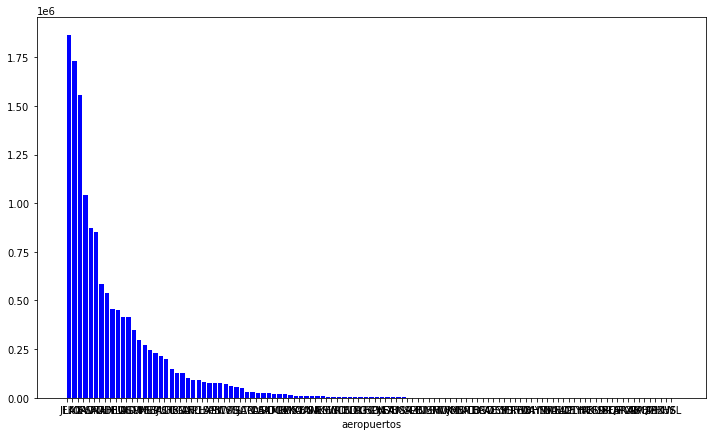

In [ ]:
passengers3=passengers3.groupby(['Iata Code Salida']).sum()


passengers3=passengers3.sort_values(by=['Total'],ascending=False)
fig, ax = plt.subplots(figsize=(12, 7))

ax.bar(passengers3.index,passengers3['Total'],  align="edge", color='blue');
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlabel('aeropuertos')

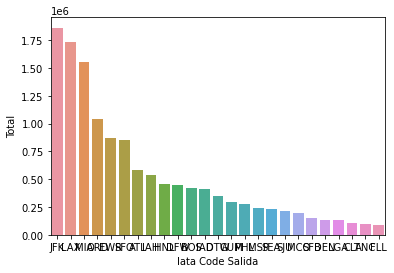

In [ ]:
passengers31=passengers3.head(25)
ax = sns.barplot(x=passengers31.index, y=passengers31['Total'], data=passengers31, estimator=median)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=aa51ed1f-54bc-4d90-bcfd-5e393b51cc29' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>